In [1]:
import pandas as pd

In [2]:
games = pd.read_csv('games.csv')
gps = pd.read_csv('gps.csv')
rpe = pd.read_csv('rpe.csv')
wellness = pd.read_csv('wellness.csv')

In [3]:
games.head()

,GameID,Date,Tournament,TournamentGame,Team,Opponent,Outcome,TeamPoints,TeamPointsAllowed
0,1,2017-11-30,Dubai,1,Canada,Spain,W,19,0
1,2,2017-11-30,Dubai,2,Canada,Ireland,W,31,0
2,3,2017-11-30,Dubai,3,Canada,Fiji,W,31,14
3,4,2017-12-01,Dubai,4,Canada,France,W,24,19
4,5,2017-12-01,Dubai,5,Canada,Australia,L,7,25


In [4]:
gps.head()

,GameID,Half,PlayerID,FrameID,Time,GameClock,Speed,AccelImpulse,AccelLoad,AccelX,AccelY,AccelZ,Longitude,Latitude
0,1,1,2,1,00:22:01,00:00:00,0.658334,0.611112,0.005330,0.13250,0.69875,0.56500,55.466666,24.994873
1,1,1,2,2,00:22:01,00:00:00,0.594445,0.638889,0.006568,0.11125,0.92000,0.70625,55.466666,24.994874
2,1,1,2,3,00:22:01,00:00:00,0.363889,2.305557,0.003114,0.01375,0.77000,0.67750,55.466667,24.994874
3,1,1,2,4,00:22:01,00:00:00,0.444445,0.805556,0.002602,0.00625,0.88625,0.59500,55.466667,24.994874
4,1,1,2,5,00:22:01,00:00:00,0.400000,0.444445,0.003813,-0.01750,0.85750,0.57375,55.466668,24.994874


In [5]:
rpe.head()

,Date,PlayerID,Training,SessionType,Duration,RPE,SessionLoad,DailyLoad,AcuteLoad,ChronicLoad,AcuteChronicRatio,ObjectiveRating,FocusRating,BestOutOfMyself
0,2018-07-21,13,Yes,Mobility/Recovery,5.0,0.0,0.0,446.0,323.1,303.25,1.07,NaN,NaN,Not at all
1,2018-07-21,13,Yes,Game,29.0,7.0,203.0,NaN,NaN,NaN,NaN,NaN,NaN,Not at all
2,2018-07-21,13,Yes,Game,27.0,9.0,243.0,NaN,NaN,NaN,NaN,NaN,NaN,Not at all
3,2018-07-20,11,Yes,Game,36.0,6.0,216.0,534.0,256.3,344.18,0.74,9.0,10.0,Absolutely
4,2018-07-20,11,Yes,Game,36.0,8.0,288.0,NaN,NaN,NaN,NaN,9.0,10.0,Absolutely


In [6]:
wellness.head()

,Date,PlayerID,Fatigue,Soreness,Desire,Irritability,BedTime,WakeTime,SleepHours,SleepQuality,MonitoringScore,Pain,Illness,Menstruation,Nutrition,NutritionAdjustment,USGMeasurement,USG,TrainingReadiness
0,2018-07-21,1,3,3,2,3,23:00:00,07:00:00,8.00,2,13,No,No,Yes,Excellent,Yes,No,NaN,0%
1,2018-07-21,2,4,3,4,4,23:00:00,07:00:00,8.00,4,19,Yes,No,Yes,NaN,NaN,Yes,1.010,0%
2,2018-07-21,3,3,3,5,4,22:30:00,06:30:00,8.00,4,19,No,No,No,NaN,NaN,Yes,1.016,100%
3,2018-07-21,4,2,3,5,4,00:30:00,07:00:00,6.50,1,15,No,No,Yes,Excellent,Yes,Yes,1.025,95%
4,2018-07-21,5,5,3,4,4,23:45:00,07:00:00,7.25,4,20,No,No,No,Okay,Yes,Yes,1.022,100%


In [7]:
rpe_wellness = pd.merge(rpe, wellness, on=['PlayerID','Date'])

In [8]:
rpe_wellness.head()

,Date,PlayerID,Training,SessionType,Duration,RPE,SessionLoad,DailyLoad,AcuteLoad,ChronicLoad,...,SleepQuality,MonitoringScore,Pain,Illness,Menstruation,Nutrition,NutritionAdjustment,USGMeasurement,USG,TrainingReadiness
0,2018-07-21,13,Yes,Mobility/Recovery,5.0,0.0,0.0,446.0,323.1,303.25,...,4,20,No,No,No,Excellent,Yes,Yes,1.025,100%
1,2018-07-21,13,Yes,Game,29.0,7.0,203.0,NaN,NaN,NaN,...,4,20,No,No,No,Excellent,Yes,Yes,1.025,100%
2,2018-07-21,13,Yes,Game,27.0,9.0,243.0,NaN,NaN,NaN,...,4,20,No,No,No,Excellent,Yes,Yes,1.025,100%
3,2018-07-20,11,Yes,Game,36.0,6.0,216.0,534.0,256.3,344.18,...,4,22,No,Slightly Off,No,Excellent,Yes,Yes,1.016,100%
4,2018-07-20,11,Yes,Game,36.0,8.0,288.0,NaN,NaN,NaN,...,4,22,No,Slightly Off,No,Excellent,Yes,Yes,1.016,100%


In [9]:
import matplotlib.pyplot as plt
import numpy as np

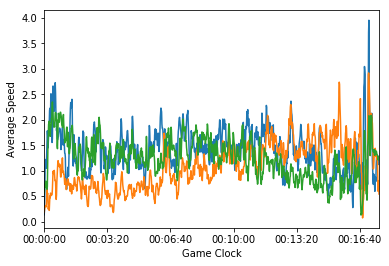

In [10]:
for playerid in np.arange(1,4):
    gpsx = gps[gps.PlayerID == playerid]
    grouped = gpsx.groupby('GameClock')
    series = grouped['Speed'].mean()
    series.plot()
plt.xlabel('Game Clock')
plt.ylabel('Average Speed')
plt.show()

In [11]:
gps.PlayerID.value_counts().sort_index()

1     288067
2     386656
3     266349
4     375038
5     288071
6      51797
7     344367
8     344673
9     103699
10    263989
11    391560
12    288509
13    387581
14    181733
15    211797
16    288413
17     56248
18      9953
19      9953
20      9953
21     21754
Name: PlayerID, dtype: int64

In [12]:
wellness.SleepQuality.value_counts()

4    2505
3    1037
5     508
2     386
6     242
1     193
7     140
Name: SleepQuality, dtype: int64

In [13]:
rpe.RPE.value_counts()

3.0    1477
5.0    1442
4.0    1362
6.0     624
7.0     567
2.0     563
0.0     502
1.0     442
8.0     392
9.0     250
Name: RPE, dtype: int64

In [14]:
corr_arr = []
for playerid in np.arange(1,17):
    playerwell = wellness[wellness.PlayerID == playerid]
    groupedwell = playerwell.groupby('Date')
    playerrpe = rpe[rpe.PlayerID == 1]
    groupedrpe = playerrpe.groupby('Date')
    seriesrpe = groupedrpe['ObjectiveRating'].mean()
    serieswell = groupedwell['SleepQuality'].mean()
    corr = seriesrpe.corr(serieswell, method='spearman')
    corr_arr.append((playerid, corr))
corr_arr

[(1, 0.1384189703345727),
 (2, 0.22877630380704023),
 (3, nan),
 (4, -0.06356821318467001),
 (5, -0.2680880404399877),
 (6, -0.47766165513794134),
 (7, 0.19120114596752394),
 (8, -0.19559701716823213),
 (9, nan),
 (10, 0.31898474144271827),
 (11, 0.0836254575910305),
 (12, 0.05002379414798674),
 (13, 0.2708933745079952),
 (14, -0.38697874339408433),
 (15, -0.20945453784672585),
 (16, -0.4168662428953521)]